In [33]:
import pandas as pd
df_housingdata = pd.read_csv('housingdata.csv')
df_housingdata

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [37]:
# Filtered_housingdata 불러오기
import pandas as pd
df_filtered_housingdata2 = pd.read_csv("filtered_housingdata2.csv")
df_filtered_housingdata2

# MEBV 칼럼 추가
df1 = pd.read_csv('housingdata.csv')
df2 = pd.read_csv('filtered_housingdata.csv')

#df2에 df1의 특정 열 추가하기
df2['MEDV'] = df1['MEDV']

# 변경된 파일 저장하기
df2.to_csv("filtered_housingdata2.csv", index=False)

print("열이 추가된 파일이 저장되었습니다.")

열이 추가된 파일이 저장되었습니다.


In [38]:
# 결측치 처리_행 제거(데이터 손실 발생 40개)
# NaN이 입력된 값에 다른 값을 대체하는 순간 신뢰성이 떨어진다고 판단해서 "제거"로 결측치를 처리함
df_filtered_housingdata_dropped_rows = df_filtered_housingdata2.dropna()
df_filtered_housingdata_dropped_rows

,CRIM,NOX,AGE,MEDV
0,0.00632,0.538,65.2,24.0
1,0.02731,0.469,78.9,21.6
2,0.02729,0.469,61.1,34.7
3,0.03237,0.458,45.8,33.4
4,0.06905,0.458,54.2,36.2
...,...,...,...,...
500,0.22438,0.585,79.7,16.8
501,0.06263,0.573,69.1,22.4
502,0.04527,0.573,76.7,20.6
503,0.06076,0.573,91.0,23.9


Text(0.5, 1.0, 'CRIM')

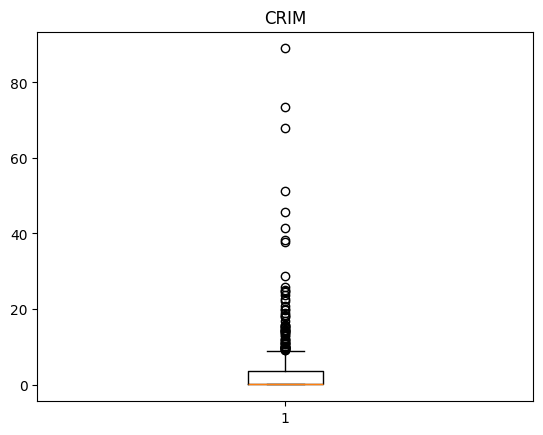

In [41]:
# 그래프 만들기(CRIM 칼럼의 이상치, 최댓&최솟값, 유효값 확인)
# 해석 : 데이터 양이 적어서 판단이 불가하다고 판단함
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.boxplot(df_filtered_housingdata_dropped_rows['CRIM'])
plt.title("CRIM")   # 그래프 제목 적기


Text(0.5, 1.0, 'NOX')

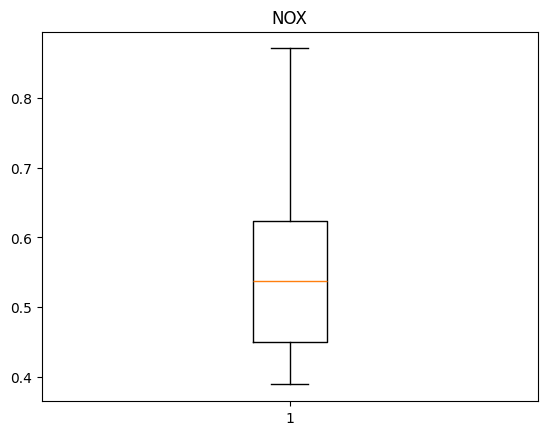

In [42]:
# 그래프 만들기(NOX 칼럼의 이상치, 최댓&최솟값, 유효값 확인)
# 해석 : 이상치가 없다고 판단함
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.boxplot(df_filtered_housingdata_dropped_rows['NOX'])
plt.title("NOX")    # 그래프 제목 적기


Text(0.5, 1.0, 'AGE')

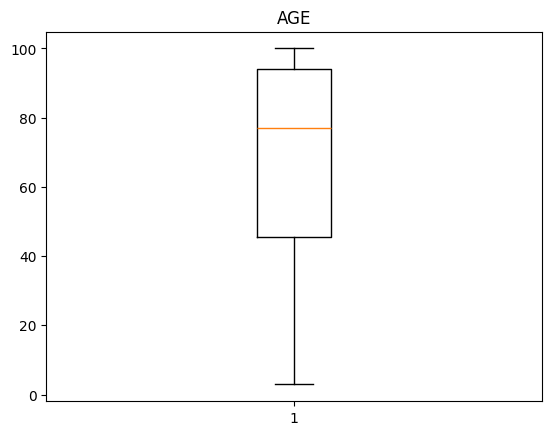

In [43]:
# 그래프 만들기(AGE 칼럼의 이상치, 최댓&최솟값, 유효값 확인)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.boxplot(df_filtered_housingdata_dropped_rows['AGE'])
plt.title("AGE")    # 그래프 제목 적기

In [44]:
# 특정 열의 이상치 확인(IQR 방법)_1사분위와 3사분위 값을 토대로 이상치 찾음
Q1 = df_filtered_housingdata_dropped_rows['CRIM'].quantile(0.25)
Q3 = df_filtered_housingdata_dropped_rows['CRIM'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 범위 설정
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR

outliers = df_filtered_housingdata_dropped_rows[
    (df_filtered_housingdata_dropped_rows['CRIM'] < lower_bound) | 
    (df_filtered_housingdata_dropped_rows['CRIM'] > upper_bound)]

outliers


,CRIM,NOX,AGE,MEDV
367,13.5222,0.631,100.0,23.1
371,9.2323,0.631,100.0,50.0
373,11.1081,0.668,100.0,13.8
374,18.4982,0.668,100.0,13.8
375,19.6091,0.671,97.9,15.0
...,...,...,...,...
468,15.5757,0.580,71.0,19.1
469,13.0751,0.580,56.7,20.1
477,15.0234,0.614,97.3,12.0
478,10.2330,0.614,96.7,14.6


In [45]:
# CRIM 이상치 제거
df_no_outliers = df_filtered_housingdata_dropped_rows[
    (df_filtered_housingdata_dropped_rows['CRIM'] >= lower_bound) & 
    (df_filtered_housingdata_dropped_rows['CRIM'] <= upper_bound)]

df_no_outliers

,CRIM,NOX,AGE,MEDV
0,0.00632,0.538,65.2,24.0
1,0.02731,0.469,78.9,21.6
2,0.02729,0.469,61.1,34.7
3,0.03237,0.458,45.8,33.4
4,0.06905,0.458,54.2,36.2
...,...,...,...,...
500,0.22438,0.585,79.7,16.8
501,0.06263,0.573,69.1,22.4
502,0.04527,0.573,76.7,20.6
503,0.06076,0.573,91.0,23.9


In [48]:
# 선형 회귀형 모델 생성
## R^2 Score가 0에 가까운 값을 띄므로 성능이 바닥을 침을 알 수 있음
## CRIM, NOX, AGE 둥의 적은 양의 데이터로는 연관성을 찾기 힘듦을 알 수 있음

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 입력 변수(X)와 타겟 변수(y) 분리
X = df_no_outliers.drop(columns=['MEDV'])  # 'target'은 목표 변수(예: CRIM과 무관한 타겟 변수)
y = df_no_outliers['MEDV']  # 타겟 변수 이름을 지정

# 훈련 데이터와 테스트 데이터로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
print("훈련 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

훈련 데이터 크기: (323, 3)
테스트 데이터 크기: (81, 3)
Mean Squared Error: 56.675544148847685
R^2 Score: 0.006371530245328549
